<a href="https://colab.research.google.com/github/Salsep0/Aulas/blob/main/Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/credit_data.csv'

In [ ]:
base_credit.loc[base_credit['age'] < 0]

In [ ]:
base_credit[base_credit['age'] < 0]

In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

In [ ]:
base_credit.index

In [ ]:
base_credit[base_credit['age'] < 0].index

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
base_credit3.loc[base_credit3['age'] < 0]

In [ ]:
base_credit.mean()

In [ ]:
base_credit['age'].mean()

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[base_credit['age'] < 0]

In [ ]:
base_credit.head(27)

In [ ]:
base_credit.isnull()

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values

In [ ]:
X_credit

In [ ]:
type(X_credit)

In [ ]:
y_credit = base_credit.iloc[:, 4].values

In [ ]:
y_credit

In [ ]:
type(y_credit)

In [ ]:
X_credit

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

In [ ]:
X_credit

In [ ]:
base_census = pd.read_csv('/content/census.csv')

In [ ]:
base_census.columns

In [ ]:
X_census = base_census.iloc[:, 0:14].values

In [ ]:
X_census

In [ ]:
X_census[0]

In [ ]:
y_census = base_census.iloc[:, 14].values

In [ ]:
y_census

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census[:,1]

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
teste

In [ ]:
X_census[0]

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

In [ ]:
X_census

In [ ]:
len(np.unique(base_census['workclass']))

In [ ]:
len(np.unique(base_census['occupation']))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

In [ ]:
X_census[0]

In [ ]:
X_census.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

NameError: name 'X_census' is not defined

In [ ]:
X_census[0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
X_credit_treinamento.shape

In [ ]:
y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

In [ ]:
Y_risco_credito = base_risco_credito.iloc[:, 4].values
Y_risco_credito

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda= LabelEncoder()

In [ ]:
X_risco_credito[:, 0]= label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1]= label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2]= label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3]= label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [ ]:
X_risco_credito

In [ ]:
import pickle
with open('RiscoCredito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, Y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

In [ ]:
 #  Historia boa (0), divida alta(0), garantias nenhuma(1), renda>35(2)
# historia ruim(2), divida alta(0), garantias adequada(0), renda<15(0)

previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
previsao

In [ ]:
naive_risco_credito.classes_

In [ ]:
naive_risco_credito.class_count_

In [ ]:
naive_risco_credito.class_prior_

Base Credit data

In [9]:
import pickle
with open ('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'credit.pkl'

In [ ]:
X_credit_treinamento.shape

(1500, 3)

In [ ]:
y_credit_treinamento.shape

(1500,)

In [ ]:
X_credit_teste.shape

(500, 3)

In [ ]:
y_credit_teste.shape

(500,)

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [26]:
from yellowbrick.classifier import ConfusionMatrix

0.938

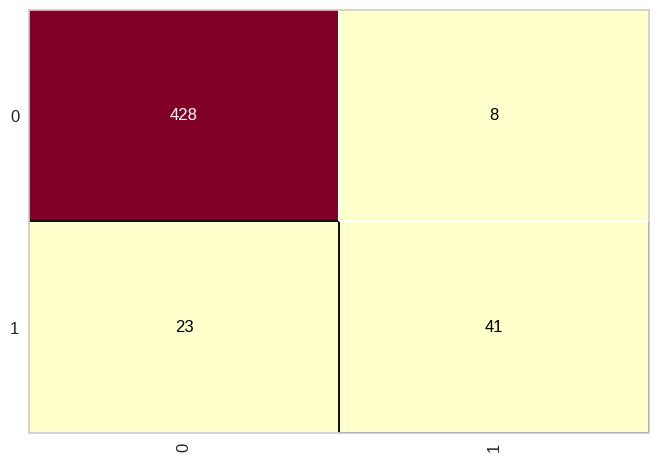

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [11]:
import pickle
with open('/content/drive/MyDrive/Salvo do Chrome/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [13]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [14]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [15]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [18]:
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [19]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [20]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

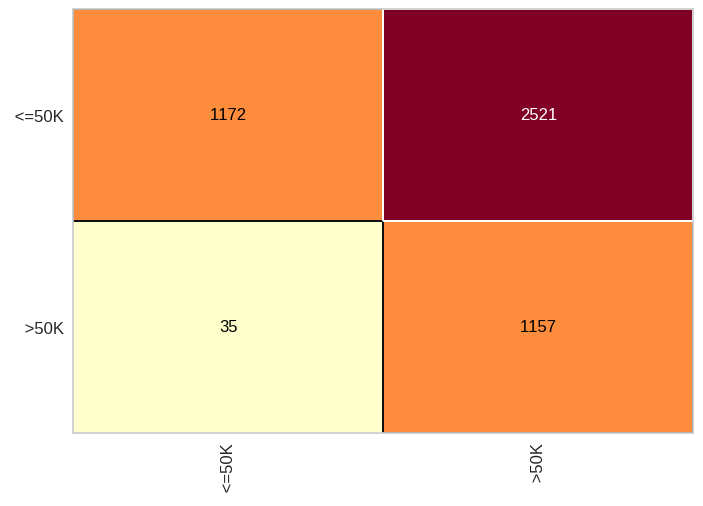

In [22]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)